<a href="https://colab.research.google.com/github/GustavoNeery/diario-oficial-avaliacao-ferramentas/blob/main/Avalia%C3%A7%C3%A3o_de_Ferramentas_de_Extra%C3%A7%C3%A3o_de_Texto_TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Avaliação de ferramentas de extração de texto de documentos PDF

####Instalando dependencias

In [ ]:
!pip3 install rouge
!pip3 install pymupdf
!pip3 install pdfminer

#### Import e configurações prévias

In [ ]:
import matplotlib.pyplot as plt
from rouge import Rouge
import pandas as pd
import numpy as np

import os


#{"pdfbox", "pdftotext", "mupdf", "pdfminer", "slate3k",}
#{1, 4, 17, 26, 60}

ferramenta_atual = "slate3k"
pagina_atual = 1

#### Conversão e pre-processamento dos dados

In [ ]:
def converte_toString(pagina, ferramenta):
  base_path = "/content/drive/MyDrive/diario-sao-paulo/"
  path_transcrito = base_path + f"textos-formatados/transcritos/pag{pagina}-transcrito.txt"
  path_extraido = base_path + f"ferramentas-de-extração/extract-{ferramenta}/pag{pagina}-extract.txt"

  with open(path_transcrito) as f:
    transcrito_convertido_str = f.read()

  with open(path_extraido) as e:
    extraido_convertido_str = e.read()

  return transcrito_convertido_str, extraido_convertido_str


#### Conversão de arquivo para String e remoção das quebras de linha




In [ ]:
transcrito_convertido_str, extraido_convertido_str = converte_toString(pagina_atual, ferramenta_atual)

transcrito_sem_quebra = transcrito_convertido_str.replace('\n', ' ')
extraido_sem_quebra = extraido_convertido_str.replace('\n', ' ')


print("Transcrito: ", transcrito_sem_quebra)
print("Extraido: ",extraido_sem_quebra)


Transcrito:  ﻿Editais GESTÃO E GOVERNO DIGITAL SUBSECRETARIA DE GESTÃO UNIDADE CENTRAL DE RECURSOS HUMANOS Departamento de Perícias Médicas do Estado CONVOCAÇÕES PARA PERICIA DE INGRESSO MINISTERIO PUBLICO DANIEL ALEXANDRE PEREIRA - 228538993 - Fica   convocado(a) a comparecer no endereço AV. BARÃO DE ITA- PURA, 1226, - BOTAFOGO - CAMPINAS, no dia 06/03/2024   ás 15:00 hs, para a realização de perícia médica para fins de ingresso, munido de documento de identidade original com foto e exames/ relatórios médicos solicitados. Cargo: AUXILIAR DE PROMOTORIA I , do(a) MINISTERIO PUBLICO. JOSE RICARDO BORGES DAS NEVES - 203487369 - Fica convocado(a) a comparecer no endereço , AV PREFEITO PASSOS S/N, GLICERIO - VARZEA DO CARMO - SAO PAULO / SP, SAO PAULO, no dia 11/03/2024 ás 13:00 hs, para a realização de perícia médica para fins de ingresso, munido de documento de identidade original com foto e exames/ relatórios médicos   solicitados. Cargo: AUXILIAR DE PROMOTORIA I , do(a) MINIS- TERIO PUB

#### Aplicando a **métrica** nas extrações

In [ ]:
hypothesis = extraido_sem_quebra

reference = transcrito_sem_quebra

rouge = Rouge()
scores = rouge.get_scores(hypothesis, reference)
for score in scores:
  dit1 = score

print(score)

{'rouge-1': {'r': 0.8289676425269645, 'p': 0.7911764705882353, 'f': 0.8096312967333451}, 'rouge-2': {'r': 0.7533875338753387, 'p': 0.7374005305039788, 'f': 0.7453083059925321}, 'rouge-l': {'r': 0.8289676425269645, 'p': 0.7911764705882353, 'f': 0.8096312967333451}}


#### Extraindo os valores individualmente e calculando a média

In [ ]:
rouge_1 = list(dit1['rouge-1'].values())

rouge_2 = list(dit1['rouge-2'].values())

rouge_l = list(dit1['rouge-l'].values())


fscore_rouge_1 = rouge_1[2]
fscore_rouge_2 = rouge_2[2]
fscore_rouge_l = rouge_l[2]

valores_fscore = [round(fscore_rouge_1, 3), round(fscore_rouge_2, 3), round(fscore_rouge_l, 3)]

print("valores_fscore: ", valores_fscore)




valores_fscore:  [0.81, 0.745, 0.81]


#### Funções utilizadas para o Df

In [ ]:
def cria_dataFrame(valores_fscore, ferramenta_atual, rotulo_linha):
    data = {ferramenta_atual: pd.Series(valores_fscore, index=[rotulo_linha])}
    return pd.DataFrame(data)

#### Armazenando os valores no DataFrame

In [ ]:
arquivo = f'metricas-documento{pagina_atual}.csv'
caminho_arquivo = f'/content/metricas-documento{pagina_atual}.csv'
rotulo_linha = ['Rouge-1', 'Rouge-2', 'Rouge-l']

#Se o arquivo ainda não tiver sido criado ele cria do 0
if not(os.path.exists(caminho_arquivo)):
  df = cria_dataFrame(valores_fscore, ferramenta_atual, rotulo_linha)
  df.to_csv(arquivo, index=True)

else:
  df = pd.read_csv(arquivo, index_col=0)

  if ferramenta_atual in df.columns:
    print("A criação do dataframe com essa ferramenta já foi realizada")
  else:
    df[ferramenta_atual] = valores_fscore
    df.to_csv(caminho_arquivo, index=True)

#### Calcula média para as páginas

In [ ]:
df1 = pd.read_csv('metricas-documento1.csv', index_col=0)
df2 = pd.read_csv('metricas-documento4.csv', index_col=0)
df3 = pd.read_csv('metricas-documento17.csv', index_col=0)
df4 = pd.read_csv('metricas-documento26.csv', index_col=0)
df5 = pd.read_csv('metricas-documento60.csv', index_col=0)

df_total = pd.concat([df1, df2, df3, df4, df5])

media = df_total.groupby(level=0).mean()

media.to_csv("/content/media-metricas.csv")

print(media)

#### Gera grafico com base no resultado das métrica

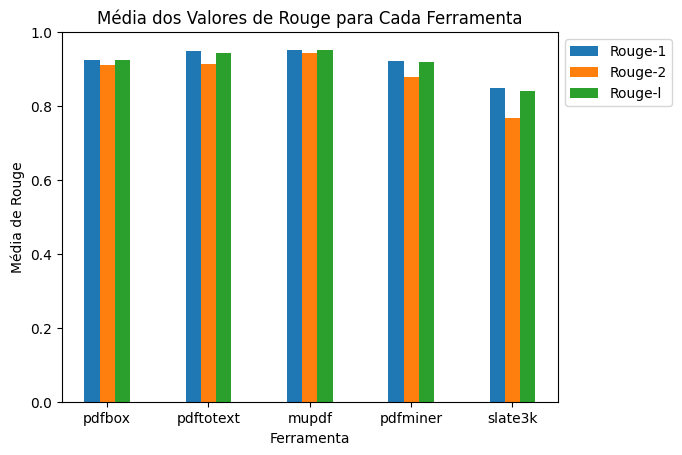

In [ ]:
# Crie uma figura e um conjunto de subtramas
fig, ax = plt.subplots()

media = pd.read_csv("/content/media-metricas.csv", index_col=0)

# Defina a largura das barras e a posição das barras no eixo x
bar_width = 0.15
x = np.arange(len(media.columns))

# Crie um gráfico de barras para cada linha (Rouge-1, Rouge-2, Rouge-l)
for i, row in enumerate(media.index):
    ax.bar(x + i*bar_width, media.loc[row], width=bar_width, label=row)

# Defina o título e os rótulos dos eixos
ax.set_title('Média dos Valores de Rouge para Cada Ferramenta')
ax.set_xlabel('Ferramenta')
ax.set_ylabel('Média de Rouge')
ax.set_xticks(x + bar_width)
ax.set_xticklabels(media.columns)
ax.set_ylim([0, 1])

# Adicione uma legenda
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Mostre o gráfico
plt.show()